In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

In [3]:
def get_Dmetric(df, metric_pct):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    return f(metric_pct)

In [4]:
def get_HI(df):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    HI = (f(2.0) - f(98.0))/f(50.0)
    return HI

In [5]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is AE83-8D62

 Directory of C:\Users\RCole02.ROYALSURREY\Desktop\GitHub\Useful-python-for-medical-physics\Experiments in ipython notebooks\Project\Lung comparison\Case31

06/02/2017  14:33    <DIR>          .
06/02/2017  14:33    <DIR>          ..
06/02/2017  10:37    <DIR>          .ipynb_checkpoints
06/02/2017  10:37    <DIR>          __pycache__
06/02/2017  14:33            65,129 Case31 6-2-2017.ipynb
06/02/2017  12:25         2,547,972 Case31_AAA.txt
06/02/2017  12:27         2,475,261 Case31_AXB.txt
06/02/2017  10:32                44 info.txt
25/11/2016  09:23             3,006 pyEclipseDVH.py
               5 File(s)      5,091,412 bytes
               4 Dir(s)  365,665,390,592 bytes free


In [6]:
AAA = eclipse_DVH('Case31_AAA.txt')
AXB = eclipse_DVH('Case31_AXB.txt')

Case31_AAA.txt loaded 	 patID = Case31_AAA	 Prescription [Gy] = 55.000
Case31_AXB.txt loaded 	 patID = Case31_AXB_Dm	 Prescription [Gy] = 55.000


In [7]:
AAA.DVH_df.columns

Index(['BODY', 'Foramen+3mm', 'L Brachial plex', 'Oesophagus', 'Heart',
       'Trachea', 'Airway avoidance', 'PTV CHEST', 'Lt_Lung', 'Foramen',
       'PTV ring 2-3cm', 'Rt_Lung', 'Bronchial tree', 'Both Lungs-ITV', 'Skin',
       'PseudoPTV-ITV', 'ITV', 'Ribs', 'R Brachial plex', 'CONTRAST',
       'Both Lungs', 'Pseudo ITV', 'Ribs-PTV', 'Inner Ring', 'Skin-PTV+2cm',
       'Ribs_GD', 'Dose 100[%]', 'Dose 50[%]'],
      dtype='object')

(50, 80)

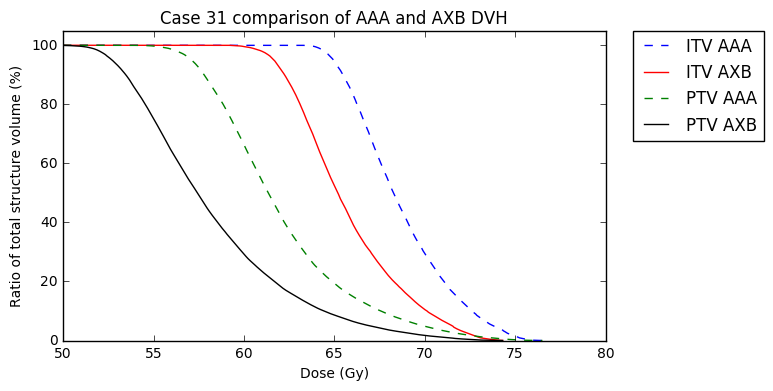

In [8]:
width=7
height=4
plt.figure(figsize=(width, height))

structure = 'ITV'
plt.plot(AAA.DVH_df[structure], label="ITV AAA", color='b', ls='--')
plt.plot(AXB.DVH_df[structure], label="ITV AXB",  color='r' )

structure = 'PTV CHEST'
plt.plot(AAA.DVH_df[structure], label="PTV AAA", color='g', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV AXB",  color='k' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Case 31 comparison of AAA and AXB DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')
plt.ylim([0,105])
plt.xlim([50,80])

In [9]:
Comparison_df = pd.concat([  #AAA.metrics_df['PTV CHEST_P28'], 
                          # AXB.metrics_df['PTV CHEST_P28'], 
                           
                           AAA.metrics_df['ITV'], 
                           AXB.metrics_df['ITV']], 
                           axis=1)
Comparison_df

,ITV,ITV
Metric,,
Structure,ITV,ITV
Approval Status,Unapproved,Unapproved
Plan,Case31_AAA,Case31_AXB_Dm
Course,30,30
Volume [cmÂ³],1.1,1.1
Dose Cover.[%],100.0,100.0
Sampling Cover.[%],99.7,100.3
Min Dose [%],114.8,107.2
Max Dose [%],139.2,135.2


In [10]:
print('The AAA HI is: {}'.format(get_HI(AAA.DVH_df['ITV'])))
print('The AXB HI is: {}'.format(get_HI(AXB.DVH_df['ITV'])))

The AAA HI is: 0.15106977896452434
The AXB HI is: 0.17782967243662803


In [33]:
print('The AAA HI is: {}'.format(get_HI(AAA.DVH_df['PTV CHEST'])))
print('The AXB HI is: {}'.format(get_HI(AXB.DVH_df['PTV CHEST'])))

The AAA HI is: 0.25955876505419695
The AXB HI is: 0.306816258727099
